In [1]:
# Imports
import pandas as pd
import regex as re
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read the csv.
ecom = pd.read_csv("Ecommerce_purchases.csv")

In [3]:
# 1. Display top 10 rows of the dataset.
ecom.head(10)

,Address,Lot,AM or PM,Browser Info,Company,Credit Card,CC Exp Date,CC Security Code,CC Provider,Email,Job,IP Address,Language,Purchase Price
0,"16629 Pace Camp Apt. 448\r\nAlexisborough, NE ...",46 in,PM,Opera/9.56.(X11; Linux x86_64; sl-SI) Presto/2...,Martinez-Herman,6011929061123406,02/20,900,JCB 16 digit,pdunlap@yahoo.com,"Scientist, product/process development",149.146.147.205,el,98.14
1,"9374 Jasmine Spurs Suite 508\r\nSouth John, TN...",28 rn,PM,Opera/8.93.(Windows 98; Win 9x 4.90; en-US) Pr...,"Fletcher, Richards and Whitaker",3337758169645356,11/18,561,Mastercard,anthony41@reed.com,Drilling engineer,15.160.41.51,fr,70.73
2,Unit 0065 Box 5052\r\nDPO AP 27450,94 vE,PM,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,"Simpson, Williams and Pham",675957666125,08/19,699,JCB 16 digit,amymiller@morales-harrison.com,Customer service manager,132.207.160.22,de,0.95
3,"7780 Julia Fords\r\nNew Stacy, WA 45798",36 vm,PM,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_0 ...,"Williams, Marshall and Buchanan",6011578504430710,02/24,384,Discover,brent16@olson-robinson.info,Drilling engineer,30.250.74.19,es,78.04
4,"23012 Munoz Drive Suite 337\r\nNew Cynthia, TX...",20 IE,AM,Opera/9.58.(X11; Linux x86_64; it-IT) Presto/2...,"Brown, Watson and Andrews",6011456623207998,10/25,678,Diners Club / Carte Blanche,christopherwright@gmail.com,Fine artist,24.140.33.94,es,77.82
5,"7502 Powell Mission Apt. 768\r\nTravisland, VA...",21 XT,PM,Mozilla/5.0 (Macintosh; U; PPC Mac OS X 10_8_5...,Silva-Anderson,30246185196287,07/25,7169,Discover,ynguyen@gmail.com,Fish farm manager,55.96.152.147,ru,25.15
6,"93971 Conway Causeway\r\nAndersonburgh, AZ 75107",96 Xt,AM,Mozilla/5.0 (compatible; MSIE 7.0; Windows NT ...,Gibson and Sons,6011398782655569,07/24,714,VISA 16 digit,olivia04@yahoo.com,Dancer,127.252.144.18,de,88.56
7,"260 Rachel Plains Suite 366\r\nCastroberg, WV ...",96 pG,PM,Mozilla/5.0 (X11; Linux i686) AppleWebKit/5350...,Marshall-Collins,561252141909,06/25,256,VISA 13 digit,phillip48@parks.info,Event organiser,224.247.97.150,pt,44.25
8,"2129 Dylan Burg\r\nNew Michelle, ME 28650",45 JN,PM,Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10_7...,Galloway and Sons,180041795790001,04/24,899,JCB 16 digit,kdavis@rasmussen.com,Financial manager,146.234.201.229,ru,59.54
9,"3795 Dawson Extensions\r\nLake Tinafort, ID 88739",15 Ug,AM,Mozilla/5.0 (X11; Linux i686; rv:1.9.7.20) Gec...,"Rivera, Buchanan and Ramirez",4396283918371,01/17,931,American Express,qcoleman@hunt-huerta.com,Forensic scientist,236.198.199.8,zh,95.63


In [4]:
# 2. Check last 10 rows of the dataset.
ecom.tail(10)

,Address,Lot,AM or PM,Browser Info,Company,Credit Card,CC Exp Date,CC Security Code,CC Provider,Email,Job,IP Address,Language,Purchase Price
9990,"75731 Molly Springs\r\nWest Danielle, VT 96934...",93 ty,PM,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_7_4;...,"Pace, Vazquez and Richards",869968197049750,04/24,877,JCB 15 digit,andersonmichael@sherman.biz,Early years teacher,54.170.3.185,ru,18.35
9991,"PSC 8165, Box 8498\r\nAPO AP 60327-0346",50 dA,AM,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Snyder Inc,4221582137197481,02/24,969,Voyager,kking@wise-liu.com,IT sales professional,254.25.31.156,el,25.93
9992,"885 Allen Mountains Apt. 230\r\nWallhaven, LA ...",40 vH,PM,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_6_5) A...,Wells Ltd,4664825258997302,10/20,431,Discover,bberry@wright.net,Set designer,174.173.51.32,de,67.96
9993,"7555 Larson Locks Suite 229\r\nEllisburgh, MA ...",72 jg,PM,Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10_8...,Colon and Sons,30025560104631,10/25,629,Maestro,chelseawilliams@lopez.biz,"Designer, exhibition/display",177.46.82.128,el,65.61
9994,"6276 Rojas Hollow\r\nLake Louis, WY 56410-7837",93 Ex,PM,Opera/9.68.(X11; Linux x86_64; sl-SI) Presto/2...,Ritter-Smith,3112186784121077,01/25,1823,Maestro,iroberts@gmail.com,"Education officer, museum",242.44.112.18,zh,31.85
9995,"966 Castaneda Locks\r\nWest Juliafurt, CO 96415",92 XI,PM,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/5352 ...,Randall-Sloan,342945015358701,03/22,838,JCB 15 digit,iscott@wade-garner.com,Printmaker,29.73.197.114,it,82.21
9996,"832 Curtis Dam Suite 785\r\nNorth Edwardburgh,...",41 JY,AM,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,"Hale, Collins and Wilson",210033169205009,07/25,207,JCB 16 digit,mary85@hotmail.com,Energy engineer,121.133.168.51,pt,25.63
9997,Unit 4434 Box 6343\r\nDPO AE 28026-0283,74 Zh,AM,Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10_7...,Anderson Ltd,6011539787356311,05/21,1,VISA 16 digit,tyler16@gmail.com,Veterinary surgeon,156.210.0.254,el,83.98
9998,"0096 English Rest\r\nRoystad, IA 12457",74 cL,PM,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_8;...,Cook Inc,180003348082930,11/17,987,American Express,elizabethmoore@reid.net,Local government officer,55.78.26.143,es,38.84
9999,"40674 Barrett Stravenue\r\nGrimesville, WI 79682",64 Hr,AM,Mozilla/5.0 (X11; Linux i686; rv:1.9.5.20) Gec...,Greene Inc,4139972901927273,02/19,302,JCB 15 digit,rachelford@vaughn.com,"Embryologist, clinical",176.119.198.199,el,67.59


In [5]:
# 3. Check the datatypes of each column.
ecom.dtypes

Address              object
Lot                  object
AM or PM             object
Browser Info         object
Company              object
Credit Card           int64
CC Exp Date          object
CC Security Code      int64
CC Provider          object
Email                object
Job                  object
IP Address           object
Language             object
Purchase Price      float64
dtype: object

In [6]:
# No arithmatic needed for "Credit Card" or "CC Security Code" so convert dtype to object
ecom["Credit Card"] = ecom["Credit Card"].astype(str)
ecom["CC Security Code"] = ecom["CC Security Code"].astype(str)
ecom.dtypes

Address              object
Lot                  object
AM or PM             object
Browser Info         object
Company              object
Credit Card          object
CC Exp Date          object
CC Security Code     object
CC Provider          object
Email                object
Job                  object
IP Address           object
Language             object
Purchase Price      float64
dtype: object

In [7]:
# 4. Check for null values in the dataset. 
# a. When the isnull() method is used, it creates a boolean table.
ecom.isnull()

,Address,Lot,AM or PM,Browser Info,Company,Credit Card,CC Exp Date,CC Security Code,CC Provider,Email,Job,IP Address,Language,Purchase Price
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
# b. Now count how many null values are in the dataset.
ecom.isnull().sum()

Address             0
Lot                 0
AM or PM            0
Browser Info        0
Company             0
Credit Card         0
CC Exp Date         0
CC Security Code    0
CC Provider         0
Email               0
Job                 0
IP Address          0
Language            0
Purchase Price      0
dtype: int64

In [9]:
# 5. How many rows and columns are there in the dataset?
print(f"There are {ecom.shape[0]} rows and {ecom.shape[1]} columns.")

There are 10000 rows and 14 columns.


In [10]:
# 6. Show all columns first then find the length of them.
print("Length of column titles")
for column in ecom.columns:print(f"{column}: {len(column)}")

Length of column titles
Address: 7
Lot: 3
AM or PM: 8
Browser Info: 12
Company: 7
Credit Card: 11
CC Exp Date: 11
CC Security Code: 16
CC Provider: 11
Email: 5
Job: 3
IP Address: 10
Language: 8
Purchase Price: 14


In [11]:
# 7. Show all number of rows.
print(f"There are {ecom.shape[0]} rows.")

There are 10000 rows.


In [12]:
# 8. Show complete information of dataset.
ecom.describe()

,Purchase Price
count,10000.000000
mean,50.347302
std,29.015836
min,0.000000
25%,25.150000
50%,50.505000
75%,75.770000
max,99.990000


In [13]:
# 9. Show Highest and Lowest Purchase Prices.
highest = ecom["Purchase Price"].max()
lowest = ecom["Purchase Price"].min()
print(f"The highest purchase price was ${highest}. The lowest purchase price was ${lowest}.")

The highest purchase price was $99.99. The lowest purchase price was $0.0.


In [14]:
# a. Try to show all columns names so that one can easily pick the column
for column in ecom.columns: print(column)

Address
Lot
AM or PM
Browser Info
Company
Credit Card
CC Exp Date
CC Security Code
CC Provider
Email
Job
IP Address
Language
Purchase Price


In [15]:
# 10.	Show average purchase price
average = ecom["Purchase Price"].mean().round(2)
print(f"The average purchase price was ${average}.")

The average purchase price was $50.35.


In [16]:
# 11.	How many people have French 'fr' as their Language?
# a.	First show all columns then all languages
ecom["Language"].value_counts()

de    1155
ru    1155
el    1137
pt    1118
en    1098
fr    1097
es    1095
it    1086
zh    1059
Name: Language, dtype: int64

In [17]:
# b. Check whether 'fr' is there or not
bool("fr" in ecom["Language"].value_counts())

True

In [18]:
# c. Compare language to 'fr'
fr_count = ecom.Language.value_counts()["fr"]
total_lang_count = ecom.Language.count()
print(f"Out of {total_lang_count} people, {fr_count} have French as their primary language. This is {fr_count / total_lang_count * 100}%.")

Out of 10000 people, 1097 have French as their primary language. This is 10.97%.


In [19]:
# 12. Find job titles that contain the word 'engineer' 
# a. Show all columns then look for 'Job' match it with 'engineer'
ecom.Job.value_counts().filter(regex = "[eE]ngineer")

Network engineer               25
Engineer, water                25
Civil engineer, contracting    24
Automotive engineer            22
Engineer, land                 22
                               ..
Engineer, petroleum            10
Civil engineer, consulting     10
Mechanical engineer            10
Engineer, site                 10
Engineer, technical sales       9
Name: Job, Length: 61, dtype: int64

In [20]:
# b. Show all result rows having that word
engineer_lowercase = ecom[ecom["Job"].str.contains('engineer', regex = True)]
engineer_lowercase

,Address,Lot,AM or PM,Browser Info,Company,Credit Card,CC Exp Date,CC Security Code,CC Provider,Email,Job,IP Address,Language,Purchase Price
1,"9374 Jasmine Spurs Suite 508\r\nSouth John, TN...",28 rn,PM,Opera/8.93.(Windows 98; Win 9x 4.90; en-US) Pr...,"Fletcher, Richards and Whitaker",3337758169645356,11/18,561,Mastercard,anthony41@reed.com,Drilling engineer,15.160.41.51,fr,70.73
3,"7780 Julia Fords\r\nNew Stacy, WA 45798",36 vm,PM,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_0 ...,"Williams, Marshall and Buchanan",6011578504430710,02/24,384,Discover,brent16@olson-robinson.info,Drilling engineer,30.250.74.19,es,78.04
50,"41159 Michael Centers\r\nAdamsfort, RI 37108-6674",46 Ce,PM,Mozilla/5.0 (Windows 98; Win 9x 4.90; sl-SI; r...,"Wright, Williams and Mendez",4008586485908075,05/19,945,JCB 16 digit,susanvalentine@obrien.org,Mechanical engineer,213.203.143.215,de,36.85
103,"480 Ronald Cape\r\nJohnville, MA 53644",11 wg,AM,Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10_5...,Brown Inc,30276609779632,03/22,676,Discover,wtownsend@jackson-johnson.biz,Technical sales engineer,119.178.136.56,it,51.37
193,1010 Mahoney Mills Suite 486\r\nWest Daniellev...,70 Fd,AM,Mozilla/5.0 (X11; Linux i686; rv:1.9.5.20) Gec...,Wilson-Dennis,30359256148796,02/22,62,JCB 16 digit,stacy72@cruz.com,Energy engineer,189.183.41.220,pt,96.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9934,"52276 Smith Cliffs\r\nLake Vanessaview, AL 91791",40 nG,AM,Opera/9.62.(Windows NT 5.0; sl-SI) Presto/2.9....,Clay LLC,5148775191773208,05/23,583,VISA 16 digit,popejames@yahoo.com,Consulting civil engineer,130.63.250.128,el,99.75
9948,"95544 Johnson Isle Suite 939\r\nMichaelberg, R...",91 bW,AM,Opera/8.36.(X11; Linux x86_64; sl-SI) Presto/2...,Fox-Peterson,4762924304307,03/17,567,Mastercard,haleybenjamin@gmail.com,Structural engineer,120.36.140.58,en,71.89
9970,"0060 Keith Stream\r\nWestport, CO 47097",11 nt,PM,Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10_8...,"Carpenter, Good and Hart",6011485664704662,07/19,543,Discover,rangelbrian@hotmail.com,Electrical engineer,242.8.85.205,en,17.76
9977,"02182 Keith Expressway\r\nEast Shannon, CT 205...",34 RL,AM,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,"Deleon, Jacobson and Benton",4186094003664688,06/21,397,JCB 16 digit,daltoncarter@yahoo.com,Biomedical engineer,146.238.118.2,fr,94.93


In [21]:
# c. Now make your search as case insensitive
engineer_anycase = ecom[ecom["Job"].str.contains("engineer", regex = True, flags = re.IGNORECASE)]
engineer_anycase

,Address,Lot,AM or PM,Browser Info,Company,Credit Card,CC Exp Date,CC Security Code,CC Provider,Email,Job,IP Address,Language,Purchase Price
1,"9374 Jasmine Spurs Suite 508\r\nSouth John, TN...",28 rn,PM,Opera/8.93.(Windows 98; Win 9x 4.90; en-US) Pr...,"Fletcher, Richards and Whitaker",3337758169645356,11/18,561,Mastercard,anthony41@reed.com,Drilling engineer,15.160.41.51,fr,70.73
3,"7780 Julia Fords\r\nNew Stacy, WA 45798",36 vm,PM,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_0 ...,"Williams, Marshall and Buchanan",6011578504430710,02/24,384,Discover,brent16@olson-robinson.info,Drilling engineer,30.250.74.19,es,78.04
50,"41159 Michael Centers\r\nAdamsfort, RI 37108-6674",46 Ce,PM,Mozilla/5.0 (Windows 98; Win 9x 4.90; sl-SI; r...,"Wright, Williams and Mendez",4008586485908075,05/19,945,JCB 16 digit,susanvalentine@obrien.org,Mechanical engineer,213.203.143.215,de,36.85
55,"27635 Maureen Bypass Apt. 883\r\nSandraview, S...",59 LJ,AM,Mozilla/5.0 (iPod; U; CPU iPhone OS 3_3 like M...,Sims-Lyons,3158113629128344,09/19,857,VISA 16 digit,adkinsarthur@yahoo.com,"Engineer, broadcasting (operations)",227.235.89.210,pt,48.74
60,"7126 Katherine Squares\r\nPerkinsview, CO 9729...",63 qu,AM,Opera/8.68.(X11; Linux x86_64; en-US) Presto/2...,Marshall-Fernandez,349767747049645,05/20,672,JCB 15 digit,sweeneyhannah@jones.biz,"Engineer, agricultural",197.144.142.102,de,20.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9948,"95544 Johnson Isle Suite 939\r\nMichaelberg, R...",91 bW,AM,Opera/8.36.(X11; Linux x86_64; sl-SI) Presto/2...,Fox-Peterson,4762924304307,03/17,567,Mastercard,haleybenjamin@gmail.com,Structural engineer,120.36.140.58,en,71.89
9952,"9991 Vaughn Hills\r\nRacheltown, PA 55409",36 KC,PM,Mozilla/5.0 (X11; Linux i686; rv:1.9.5.20) Gec...,"Ward, Smith and Castillo",6011679271321726,09/19,964,Voyager,jonesjennifer@olson.com,"Engineer, energy",116.228.12.42,es,39.63
9970,"0060 Keith Stream\r\nWestport, CO 47097",11 nt,PM,Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10_8...,"Carpenter, Good and Hart",6011485664704662,07/19,543,Discover,rangelbrian@hotmail.com,Electrical engineer,242.8.85.205,en,17.76
9977,"02182 Keith Expressway\r\nEast Shannon, CT 205...",34 RL,AM,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,"Deleon, Jacobson and Benton",4186094003664688,06/21,397,JCB 16 digit,daltoncarter@yahoo.com,Biomedical engineer,146.238.118.2,fr,94.93


In [22]:
# d. Find the length of resulting data too
print(f"Matches for lowercase 'engineer': {engineer_lowercase.shape[0]}")
print(f"Matches for case insensitive 'engineer': {engineer_anycase.shape[0]}")

Matches for lowercase 'engineer': 531
Matches for case insensitive 'engineer': 984


In [23]:
# 13.	Find the email of the person with the following IP address: 132.207.160.22
# a. First display all column to know on which column you have to work
for column in ecom.columns: print(column)

Address
Lot
AM or PM
Browser Info
Company
Credit Card
CC Exp Date
CC Security Code
CC Provider
Email
Job
IP Address
Language
Purchase Price


In [24]:
# b. Compare the column to ip address and show the results
# Use backticks `` because "IP Address" has a space in it
specific_IP = ecom.query("`IP Address` == '132.207.160.22'")
specific_IP

,Address,Lot,AM or PM,Browser Info,Company,Credit Card,CC Exp Date,CC Security Code,CC Provider,Email,Job,IP Address,Language,Purchase Price
2,Unit 0065 Box 5052\r\nDPO AP 27450,94 vE,PM,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,"Simpson, Williams and Pham",675957666125,08/19,699,JCB 16 digit,amymiller@morales-harrison.com,Customer service manager,132.207.160.22,de,0.95


In [25]:
 # c. Now display email only of that IP address
print(f"Email: {specific_IP.Email.values[0]}")

Email: amymiller@morales-harrison.com


In [26]:
# 14.	How many People have Mastercard as their Credit Card Provider and made a purchase above 50 dollars?
# a. First display columns
for column in ecom.columns: print(column)

Address
Lot
AM or PM
Browser Info
Company
Credit Card
CC Exp Date
CC Security Code
CC Provider
Email
Job
IP Address
Language
Purchase Price


In [27]:
# b. Do some comparisons and show numbers
purchase_over_50 = ecom.query("`Purchase Price` > 50")
mastercard_users = ecom.query("`CC Provider` == 'Mastercard'")
over_50_mastercard = pd.merge(purchase_over_50, mastercard_users, on = "Credit Card", how = "inner")
over_50_mastercard

,Address_x,Lot_x,AM or PM_x,Browser Info_x,Company_x,Credit Card,CC Exp Date_x,CC Security Code_x,CC Provider_x,Email_x,...,Browser Info_y,Company_y,CC Exp Date_y,CC Security Code_y,CC Provider_y,Email_y,Job_y,IP Address_y,Language_y,Purchase Price_y
0,"9374 Jasmine Spurs Suite 508\r\nSouth John, TN...",28 rn,PM,Opera/8.93.(Windows 98; Win 9x 4.90; en-US) Pr...,"Fletcher, Richards and Whitaker",3337758169645356,11/18,561,Mastercard,anthony41@reed.com,...,Opera/8.93.(Windows 98; Win 9x 4.90; en-US) Pr...,"Fletcher, Richards and Whitaker",11/18,561,Mastercard,anthony41@reed.com,Drilling engineer,15.160.41.51,fr,70.73
1,"461 Christopher Square\r\nWest Michaelchester,...",17 SB,PM,Mozilla/5.0 (X11; Linux i686; rv:1.9.6.20) Gec...,"Beard, Abbott and Pena",6011350184276270,12/22,767,Mastercard,hannah63@yahoo.com,...,Mozilla/5.0 (X11; Linux i686; rv:1.9.6.20) Gec...,"Beard, Abbott and Pena",12/22,767,Mastercard,hannah63@yahoo.com,Photographer,73.250.176.201,el,70.15
2,USNS Alvarado\r\nFPO AA 27052-1231,26 Lh,PM,Opera/8.84.(X11; Linux i686; sl-SI) Presto/2.9...,Nicholson Group,4614997834548,03/22,909,Mastercard,ashley12@hotmail.com,...,Opera/8.84.(X11; Linux i686; sl-SI) Presto/2.9...,Nicholson Group,03/22,909,Mastercard,ashley12@hotmail.com,Sales executive,94.176.142.201,en,94.14
3,"93392 Webb Gardens Apt. 220\r\nLaurabury, AR 9...",37 om,AM,Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10_7...,Mora Ltd,6011049630969815,09/16,367,Mastercard,hgonzalez@mcdowell.com,...,Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10_7...,Mora Ltd,09/16,367,Mastercard,hgonzalez@mcdowell.com,"Lecturer, further education",216.23.95.40,zh,97.46
4,"431 Bowen Lights\r\nFergusonborough, MH 01362",31 tG,AM,Mozilla/5.0 (Windows NT 5.2; it-IT; rv:1.9.1.2...,Copeland-Lee,639032576097,06/18,868,Mastercard,nrogers@brown.com,...,Mozilla/5.0 (Windows NT 5.2; it-IT; rv:1.9.1.2...,Copeland-Lee,06/18,868,Mastercard,nrogers@brown.com,"Teacher, English as a foreign language",153.188.13.203,es,78.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,"43757 Brown Lodge\r\nValerieberg, PR 88518",68 DG,AM,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,"Jones, Williams and Dunn",6011508474487291,04/26,906,Mastercard,christian55@gmail.com,...,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,"Jones, Williams and Dunn",04/26,906,Mastercard,christian55@gmail.com,Secondary school teacher,216.118.235.145,fr,60.03
401,"95544 Johnson Isle Suite 939\r\nMichaelberg, R...",91 bW,AM,Opera/8.36.(X11; Linux x86_64; sl-SI) Presto/2...,Fox-Peterson,4762924304307,03/17,567,Mastercard,haleybenjamin@gmail.com,...,Opera/8.36.(X11; Linux x86_64; sl-SI) Presto/2...,Fox-Peterson,03/17,567,Mastercard,haleybenjamin@gmail.com,Structural engineer,120.36.140.58,en,71.89
402,"051 Samantha Wells Apt. 328\r\nScottborough, O...",11 vG,AM,Mozilla/5.0 (Macintosh; U; PPC Mac OS X 10_8_2...,"Mendoza, Zimmerman and Reilly",30232295374907,05/21,762,Mastercard,brownamy@perkins.com,...,Mozilla/5.0 (Macintosh; U; PPC Mac OS X 10_8_2...,"Mendoza, Zimmerman and Reilly",05/21,762,Mastercard,brownamy@perkins.com,"Presenter, broadcasting",61.97.84.101,it,87.15
403,"087 Larson Roads Apt. 587\r\nRicestad, WI 9807...",95 Kw,AM,Opera/9.63.(Windows NT 5.01; en-US) Presto/2.9...,"Ortiz, Schultz and Adams",4690863684605,01/19,695,Mastercard,laurenbennett@richards.com,...,Opera/9.63.(Windows NT 5.01; en-US) Presto/2.9...,"Ortiz, Schultz and Adams",01/19,695,Mastercard,laurenbennett@richards.com,Environmental education officer,106.21.237.73,pt,63.61


In [28]:
# Confirms 405 mastercard users had a purchase price over $50
over_50_mastercard_confirm = ecom.query("`Purchase Price` > 50")["CC Provider"].value_counts()
over_50_mastercard_confirm #["Mastercard"] 

JCB 16 digit                   857
VISA 16 digit                  840
JCB 15 digit                   448
Voyager                        441
Discover                       437
American Express               432
Maestro                        424
Mastercard                     405
VISA 13 digit                  399
Diners Club / Carte Blanche    369
Name: CC Provider, dtype: int64

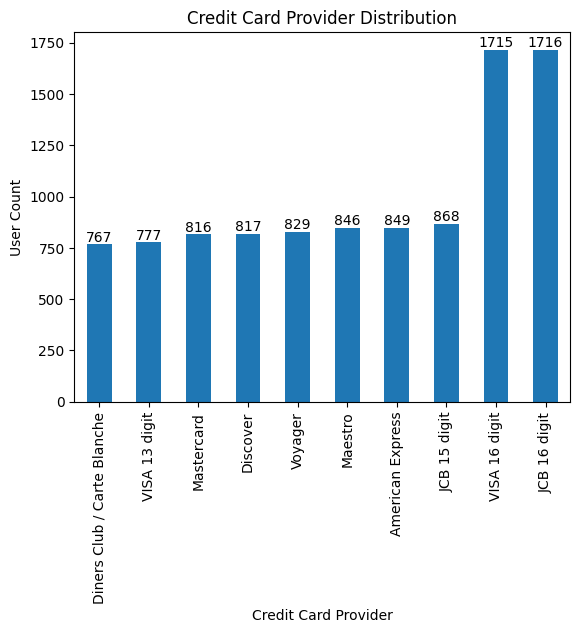

In [29]:
# Graph showing user counts for the different credit card providers
provider_plot = ecom["CC Provider"].value_counts().sort_values(ascending = True).plot.bar()
plt.title("Credit Card Provider Distribution")
plt.xlabel("Credit Card Provider")
plt.ylabel("User Count")
for bar in provider_plot.containers:
    provider_plot.bar_label(bar)

In [30]:
# 15.	Find the email of the person with the following Credit Card Number: 4664825258997302
specific_CC = ecom.query("`Credit Card` == '4664825258997302'").Email.values[0]
print(f"Email: {specific_CC}")

Email: bberry@wright.net


In [31]:
# 16.	How many people purchase during the AM and how many people purchase during PM?
ecom["AM or PM"].value_counts()

PM    5068
AM    4932
Name: AM or PM, dtype: int64

In [32]:
# 17.	How many people have a credit card that expires in 2020?
# a. Show columns first
for column in ecom.columns: print(column)

Address
Lot
AM or PM
Browser Info
Company
Credit Card
CC Exp Date
CC Security Code
CC Provider
Email
Job
IP Address
Language
Purchase Price


In [33]:
# b. Check the format of date
ecom["CC Exp Date"].value_counts()

08/22    108
01/26    105
04/19    105
01/21    104
01/19    103
        ... 
12/22     67
11/25     67
10/25     64
08/26     48
08/16     39
Name: CC Exp Date, Length: 121, dtype: int64

In [34]:
# c. Create a user defined function which counts how many persons having credit card expired in 2020
def expires_2020(df):
    expires_20 = df[df["CC Exp Date"].str.contains("\/20")]
    print(f"There are {len(expires_20)} cards that expire in 2020.")

expires_2020(ecom)

There are 988 cards that expire in 2020.


In [35]:
# 18.	What are the top 5 most popular email providers (e.g. Gmail.com, yahoo.com, etc...)
# a. Create either a user defined function or use your own any other way for getting the result.
ecom["Email Provider"] = ecom["Email"].str.split('@').str[1]
ecom["Email Provider"].value_counts().head()

hotmail.com     1638
yahoo.com       1616
gmail.com       1605
smith.com         42
williams.com      37
Name: Email Provider, dtype: int64